### 비지도학습과 데이터전처리

#### 1. 비지도학습의 종류

비지도학습의 종류는 데이터의 `비지도변환(Unsupervised transformation)`과 `군집(Clustering)`이다.

1. `비지도변환` : 오리지널 데이터를 표현하는 방법인 차원축소(`dimentionality reduction`)이다. 차원축소의 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우이다.
2. `군집알고리즘` : 데이터를 비슷한 것끼리 그룹으로 묶는 것이다.


#### 2. 데이터전처리와 스케일링

전처리방법의 종류

* `StandardScaler` : 특성의 평균=0, 분산=1로변경, 이 방법은 특성의 최소, 최대값을 제한하지 않는다.
* `RobustScaler` : StandardScaler와 비슷하지만 평균과 분산대신에 `중앙값 Median, 4분위값`
                   를 통해서 전처리한다. 이런 방식 때문에 이상치의 영향을 크게 받지 않는다.
                   이상치는 1분위와 3분위에서 대부분 걸러지기 때문
* `MinMaxScaler` : 모튼 특성들이 정확하게 0~1 사이에 위치하도록 데이터를 변경
* `Nomalizer` : 매우 다른 스케일조정방법이다. 이 방식은 특성벡터의 유클리디안거리가 1이되도록 데이터포인터를 조정한다. 다른 말로 지름이 1인 원(3차원일 때는 구)에 데이터를 투영한다.



In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['image.cmap'] = 'gray'
#plt.rcParams['axes.xmargin'] = '0.05'
#plt.rcParams['axes.ymargin'] = '0.05'

import mglearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC, SVR

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler


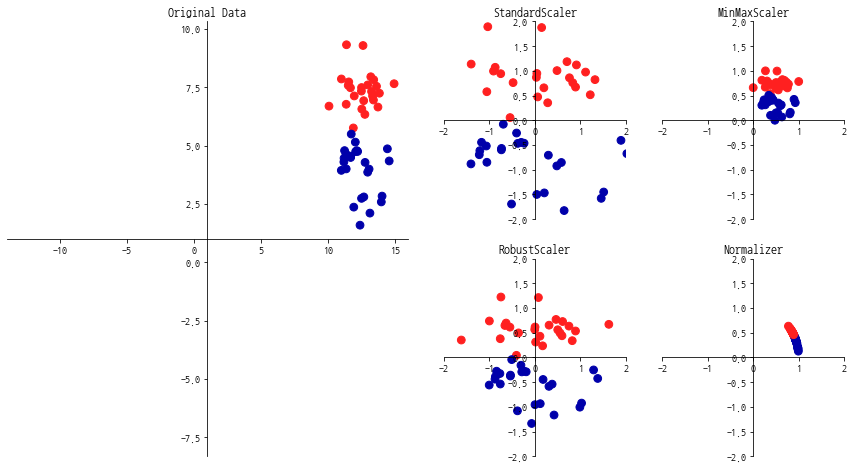

In [3]:
# 스케일 조정을 위한 인위적인 그래프
mglearn.plots.plot_scaling()

# 첫 번째 그래프는 2개의 특성을 인위적으로 만든 이진 분류의 데이터셋
# 특성1(x값)은 10~15사이의 값, 특성2(y값) 1~10까지의 값

###### 실습 1. 데이터 유방암데이터 변환

유방암데이터셋에 SVM과 MinmaxScaler를 적용

In [7]:
from sklearn.svm import SVC, SVR
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 0)


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler

# 변형할 데이터를 학습시켜야함
scaler = MinMaxScaler()
scaler.fit(x_train)

# 데이터변환
x_train_scaled = scaler.transform(x_train)


print('변환 후 크기 : {}'.format(x_train_scaled.shape))
print('변환 전 최소값 : {}'.format(x_train.min(axis=0)))
print('변환 전 최대값 : {}'.format(x_train.max(axis=0)))
print('변환 후 최소값 : {}'.format(x_train_scaled.min(axis=0)))
print('변환 후 최대값 : {}'.format(x_train_scaled.max(axis=0)))

변환 후 크기 : (426, 30)
변환 전 최소값 : [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
변환 전 최대값 : [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
변환 후 최소값 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
변환 후 최대값 : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [32]:
x_test_scaled  = scaler.transform(x_test)
print('변환 후 최소값 : {}'.format(x_test_scaled.min(axis=0)))
print('변환 후 최대값 : {}'.format(x_test_scaled.max(axis=0)))
# 결과분석
# 스케일 조정한 테스트셋의 최소값이 0~1값이 아니라 벗어난 값이 나옴 -> 훈련데이터에서 벗어난
# 값을 넣었기 때문

변환 후 최소값 : [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
변환 후 최대값 : [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


##### 훈현용과 검증용 데이터의 스케일을 동일한 방법으로 조정하기

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

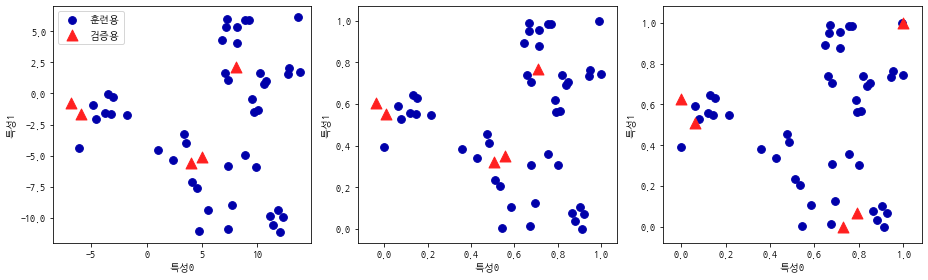

In [57]:
x, _ = datasets.make_blobs(n_samples=50, centers = 5, random_state=4, cluster_std=2)
x_train, x_test = train_test_split(x, random_state= 0, test_size =0.1)

# 시각화
# 1. 원본데이터의 시각화
fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(x_train[:,0],x_train[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)

axes[0].scatter(x_test[:,0],x_test[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')
axes[0].legend(loc='upper left')

# 2. 스케일조정데이터 시각화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

axes[1].scatter(x_train_scaled[:,0],x_train_scaled[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[1].scatter(x_test_scaled[:,0],x_test_scaled[:,1], c=mglearn.cm2(1), label = '훈련용', s=120,marker='^')


# 3. 잘못된 스케일 후 데이터의 시각화
# 검증용셋의 스케일을 따로 조정
test_scaler = MinMaxScaler()
test_scaler.fit(x_test)
x_test_scaler_bad = test_scaler.transform(x_test)

axes[2].scatter(x_train_scaled[:,0],x_train_scaled[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[2].scatter(x_test_scaler_bad[:,0],x_test_scaler_bad[:,1], c=mglearn.cm2(1), label = '훈련용', s=120,marker='^')

for ax in axes :
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
fig.tight_layout()
plt.show()


# 결과분석
# 첫번째 그래프는 원본데이터셋, 두번째는 MinMaxScaler로 스케이조정
# 훈련세트를 fit()메서드적용후, 훈련,검증세트에 transform()메서드 적용
# 축의 눈금만 0~1범위로 변경된 것만 빼면 첫번쨰, 두번째는 동일하다. 
# 세번째는 훈련,검증셋에 서로 다른 방식의 스케일을 적용했을 때 나타나는 오류이다.

In [ ]:
# 메서드체이닝기법을 기용
x_scaled = scaler.fit(x_train).transform(x_trin)

# 상기와 결과는 동일하지만 fit_transfrom()를 사용하는 것이 더 효과적
x_scaled_d = scaler.fit_transform(x_trin)

#### 2) 유방암데이터를 스케일조정 후 SVM으로 기계학습

In [64]:
# 1. 정규화전 SVM
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100).fit(x_train, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test, y_test)))

검증용세트의 정확도 : 0.944


In [63]:
# 2. 정규화 후 SVM
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
svm = SVC(C=100).fit(x_train_scaled, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test_scaled, y_test)))

검증용세트의 정확도 : 0.965


#### 3) 유방암데이터 - StandardScaler 스케일조정 후 SVM으로 기계학습

* 평균: 0 , 분산: 1인 값으로 정규화

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
svm = SVC(C=100).fit(x_train_scaled, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test_scaled, y_test)))


검증용세트의 정확도 : 0.958
검증용세트의 정확도 : 0.629


#### 연습문제
유방암 , iris데이터 셋을 가지고 스케일조정 후 비교 및 시각화를 실행
머신러닝 알고리즘은 svm, kmeans를 적용

In [ ]:
import sklearn.metrics as sm
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

# iris데이터 전처리 - minmax
scaler = MinMaxScaler().fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# 전처리 전후 데이터 분포 변화 확인 - 변화 x
fig, axes = plt.subplots(1,2,figsize=(13,4))

axes[0].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[0].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

axes[1].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[1].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

# k-means - iris데이터는 3개의 종류가 있으서 n_clusters를 3으로 지정
kmeans = KMeans(n_clusters=3).fit(x_train_std)

# 타겟이 다르게 분류된 것을 원래와 같게 분류
predY = np.choose(kmeans.labels_, [0,1,2]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black','lime'])
plt.subplot(1,2,1) # 정답
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[y_train]) 

plt.subplot(1,2,2) # 예측
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[predY])

print(sm.accuracy_score(y_train,predY))

svm = SVC(C=100).fit(x_train_std, y_train)

검증용세트의 정확도 : 0.965
0.9178403755868545


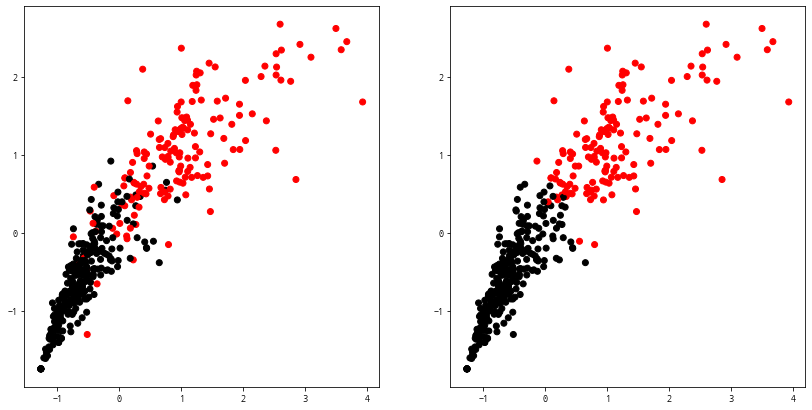

In [116]:
# 유방암데이터
cancer = datasets.load_breast_cancer()
scaler = StandardScaler().fit(cancer.data)
x = scaler.transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(x, cancer.target, random_state = 0)

svm = SVC(C=100).fit(x_train, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test, y_test)))

X = pd.DataFrame(x_train, columns= cancer.feature_names)

x = X.iloc[:,[7, 9, 14, 27]]

kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[y_train]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[predY])

# 정규분포로 정규화를 했더니 정확도가 더 떨얼짐
print(sm.accuracy_score(y_train,predY))

In [113]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,